# Contexto y preparación



### Introduccion

Dr. Ignaz Semmelweis fue un médico húngaro nacido en 1818 que trabajó en el Hospital General de Viena. En el pasado, la gente pensaba que las enfermedades eran causadas por "mal aire" o espíritus malignos. Pero en el siglo XIX, los médicos comenzaron a estudiar más la anatomía, realizando autopsias y empezaron a basar sus argumentos en datos. Dr. Semmelweis sospechaba que algo estaba saliendo mal con los procedimientos en el Hospital General de Viena. Semmelweis quería descubrir por qué tantas mujeres en las salas de maternidad morían a causa de la fiebre puerperal.




### La fuente de datos

 El Dr Semmelwais publico su investigación en 1861. Encontré las [páginas escaneadas del contenido original completo en Aleman](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), y a parte de eso una excelente [traduccón al inglés que puede ser encontrada aqui](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

[Imagen de la tabla](https://imgur.com/a/uMg989o)

### Sentencias de importación

In [42]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import scipy.stats as stats

### Configuración de presentación del cuaderno

In [43]:
pd.options.display.float_format = '{:,.2f}'.format

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Lectura de datos

In [44]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Datos preliminares



In [45]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [46]:
print(df_monthly.shape)
df_monthly.tail()

(98, 3)


,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


### Revisión de valores NaN y duplicados

In [47]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [48]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [49]:
print(f'Algun valor anual NaN? {df_monthly.isna().values.any()}')
print(f'Algun valor mensual NaN? {df_yearly.isna().values.any()}')

Algun valor anual NaN? False
Algun valor mensual NaN? False


In [50]:
print(f'Algun duplicado en años? {df_yearly.duplicated().values.any()}')
print(f'Algun duplicado en meses? {df_monthly.duplicated().values.any()}')

Algun duplicado en años? False
Algun duplicado en meses? False


### Estadísticas descriptivas

In [51]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [52]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Porcentaje de mujeres muriendo durante el parto



* Se usan los datos anuales para calcular el porcentaje de mujeres dando a luz que murieron en la écada de 1840.




In [53]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Probabilidad de morir en los 1980s en Viena Vienna: {prob:.3}%')

Probabilidad de morir en los 1980s en Viena Vienna: 7.08%


# Visualización del número total de nacimientos 🤱 y muertes 💀 a traves del tiempo

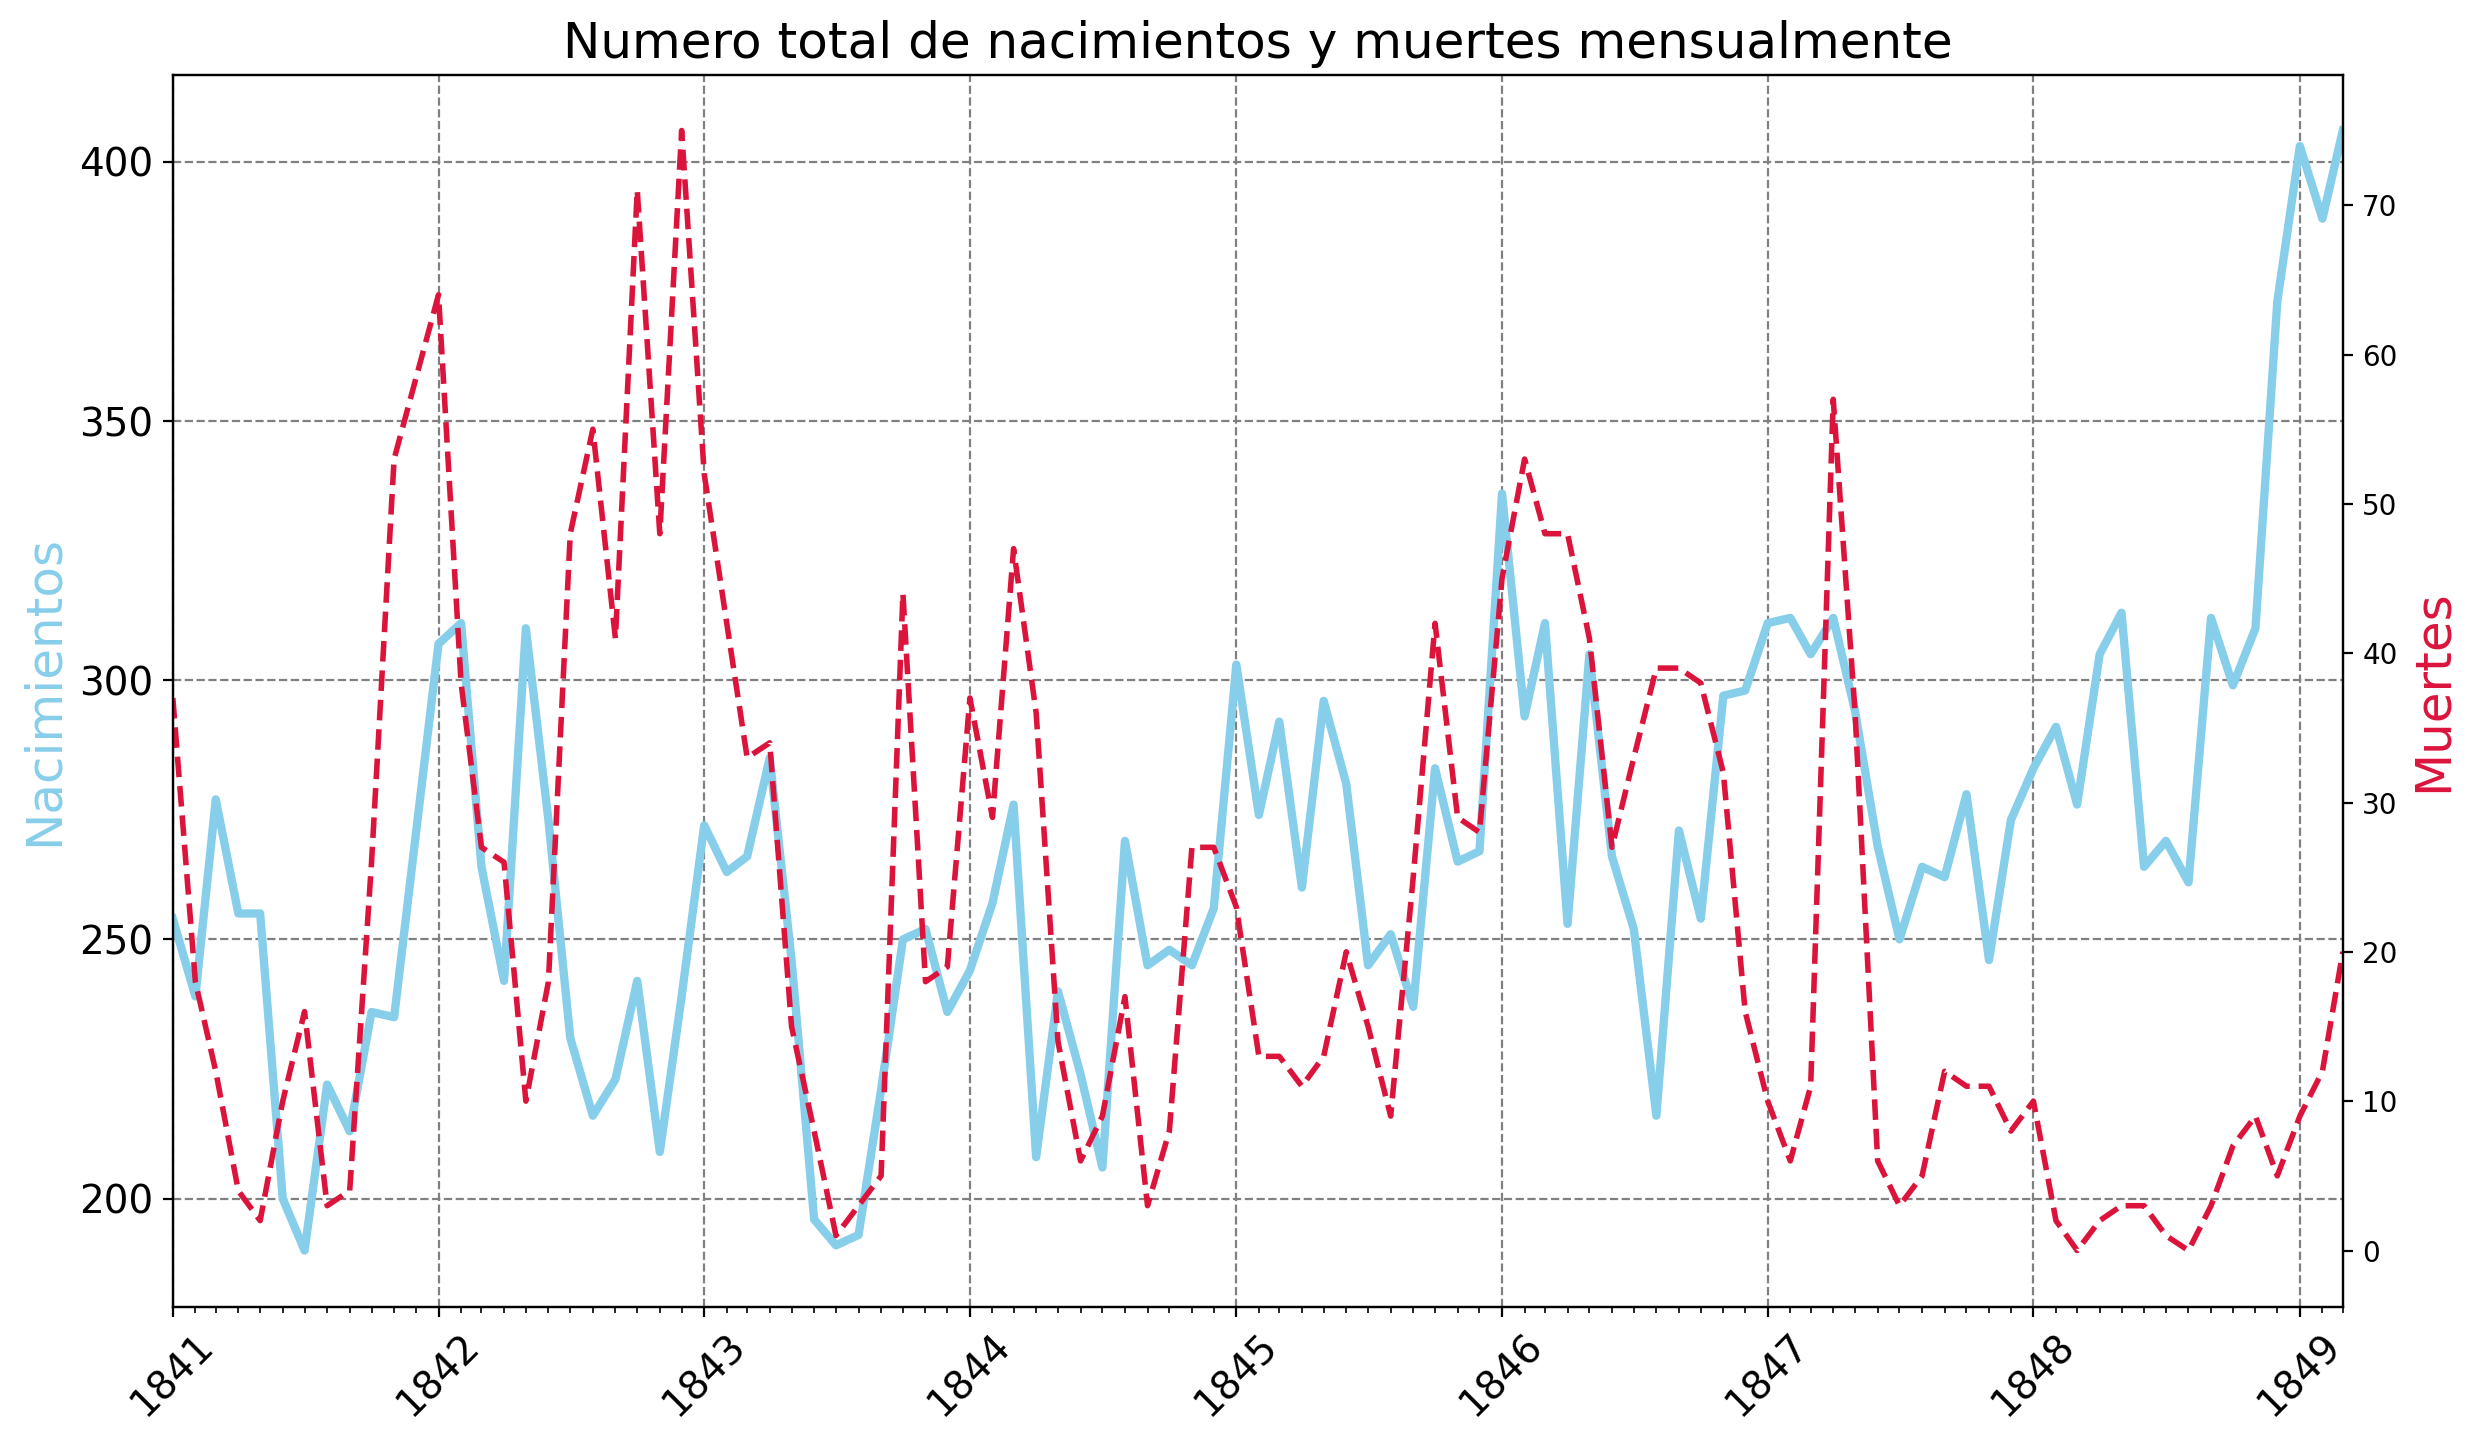

In [54]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Numero total de nacimientos y muertes mensualmente', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Nacimientos', color='skyblue', fontsize=18)
ax2.set_ylabel('Muertes', color='crimson', fontsize=18)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()

# Análisis anual por clínica





In [55]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Nacimientos totales anuales por clinica')

line.show()

In [56]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total de muertes anuales por clínica')

line.show()

### Cálculo de proporcion de muertes en cada clínica

In [57]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [58]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Ratio medio de muertes en clinica 1 is {avg_c1:.3}%.')

Ratio medio de muertes en clinica 1 is 9.92%.


In [59]:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Ratio medio de muertes en clinica 2 is {avg_c2:.3}%.')

Ratio medio de muertes en clinica 2 is 3.88%.


### Representacion de la proporcion de mmuertes anuales por clínica

In [60]:
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic',
               title='Proporcion de muertes anuales por clínica')

line.show()

# El efecto del avado de manos

Dr Semmelweis hizo obligatorio el lavado de manos en 1847. Ordenó que las personas se lavaran las manos usando cloro (En vez de agua).

In [61]:
# Fecha en la que el lavado de manos se hizo obligatorio
handwashing_start = pd.to_datetime('1847-06-01')

In [62]:
df_monthly['pct_deaths'] = df_monthly.deaths/df_monthly.births

In [63]:
# Division mensual entre antes y despues de la obligatoriedad
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [64]:
bw_rate = before_washing.deaths.sum() / before_washing.births.sum() * 100
aw_rate = after_washing.deaths.sum() / after_washing.births.sum() * 100
print(f'El ratio de muerte antes de 1847 fue {bw_rate:.4}%')
print(f'El ratio de muerte DESPUES de 1847 fue {aw_rate:.3}%')

El ratio de muerte antes de 1847 fue 10.53%
El ratio de muerte DESPUES de 1847 fue 2.15%


### Cálculo del promedio mmovil del ratio de muertes

In [65]:
# Conversión de la columna de fechas primero para que no desaparezca
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


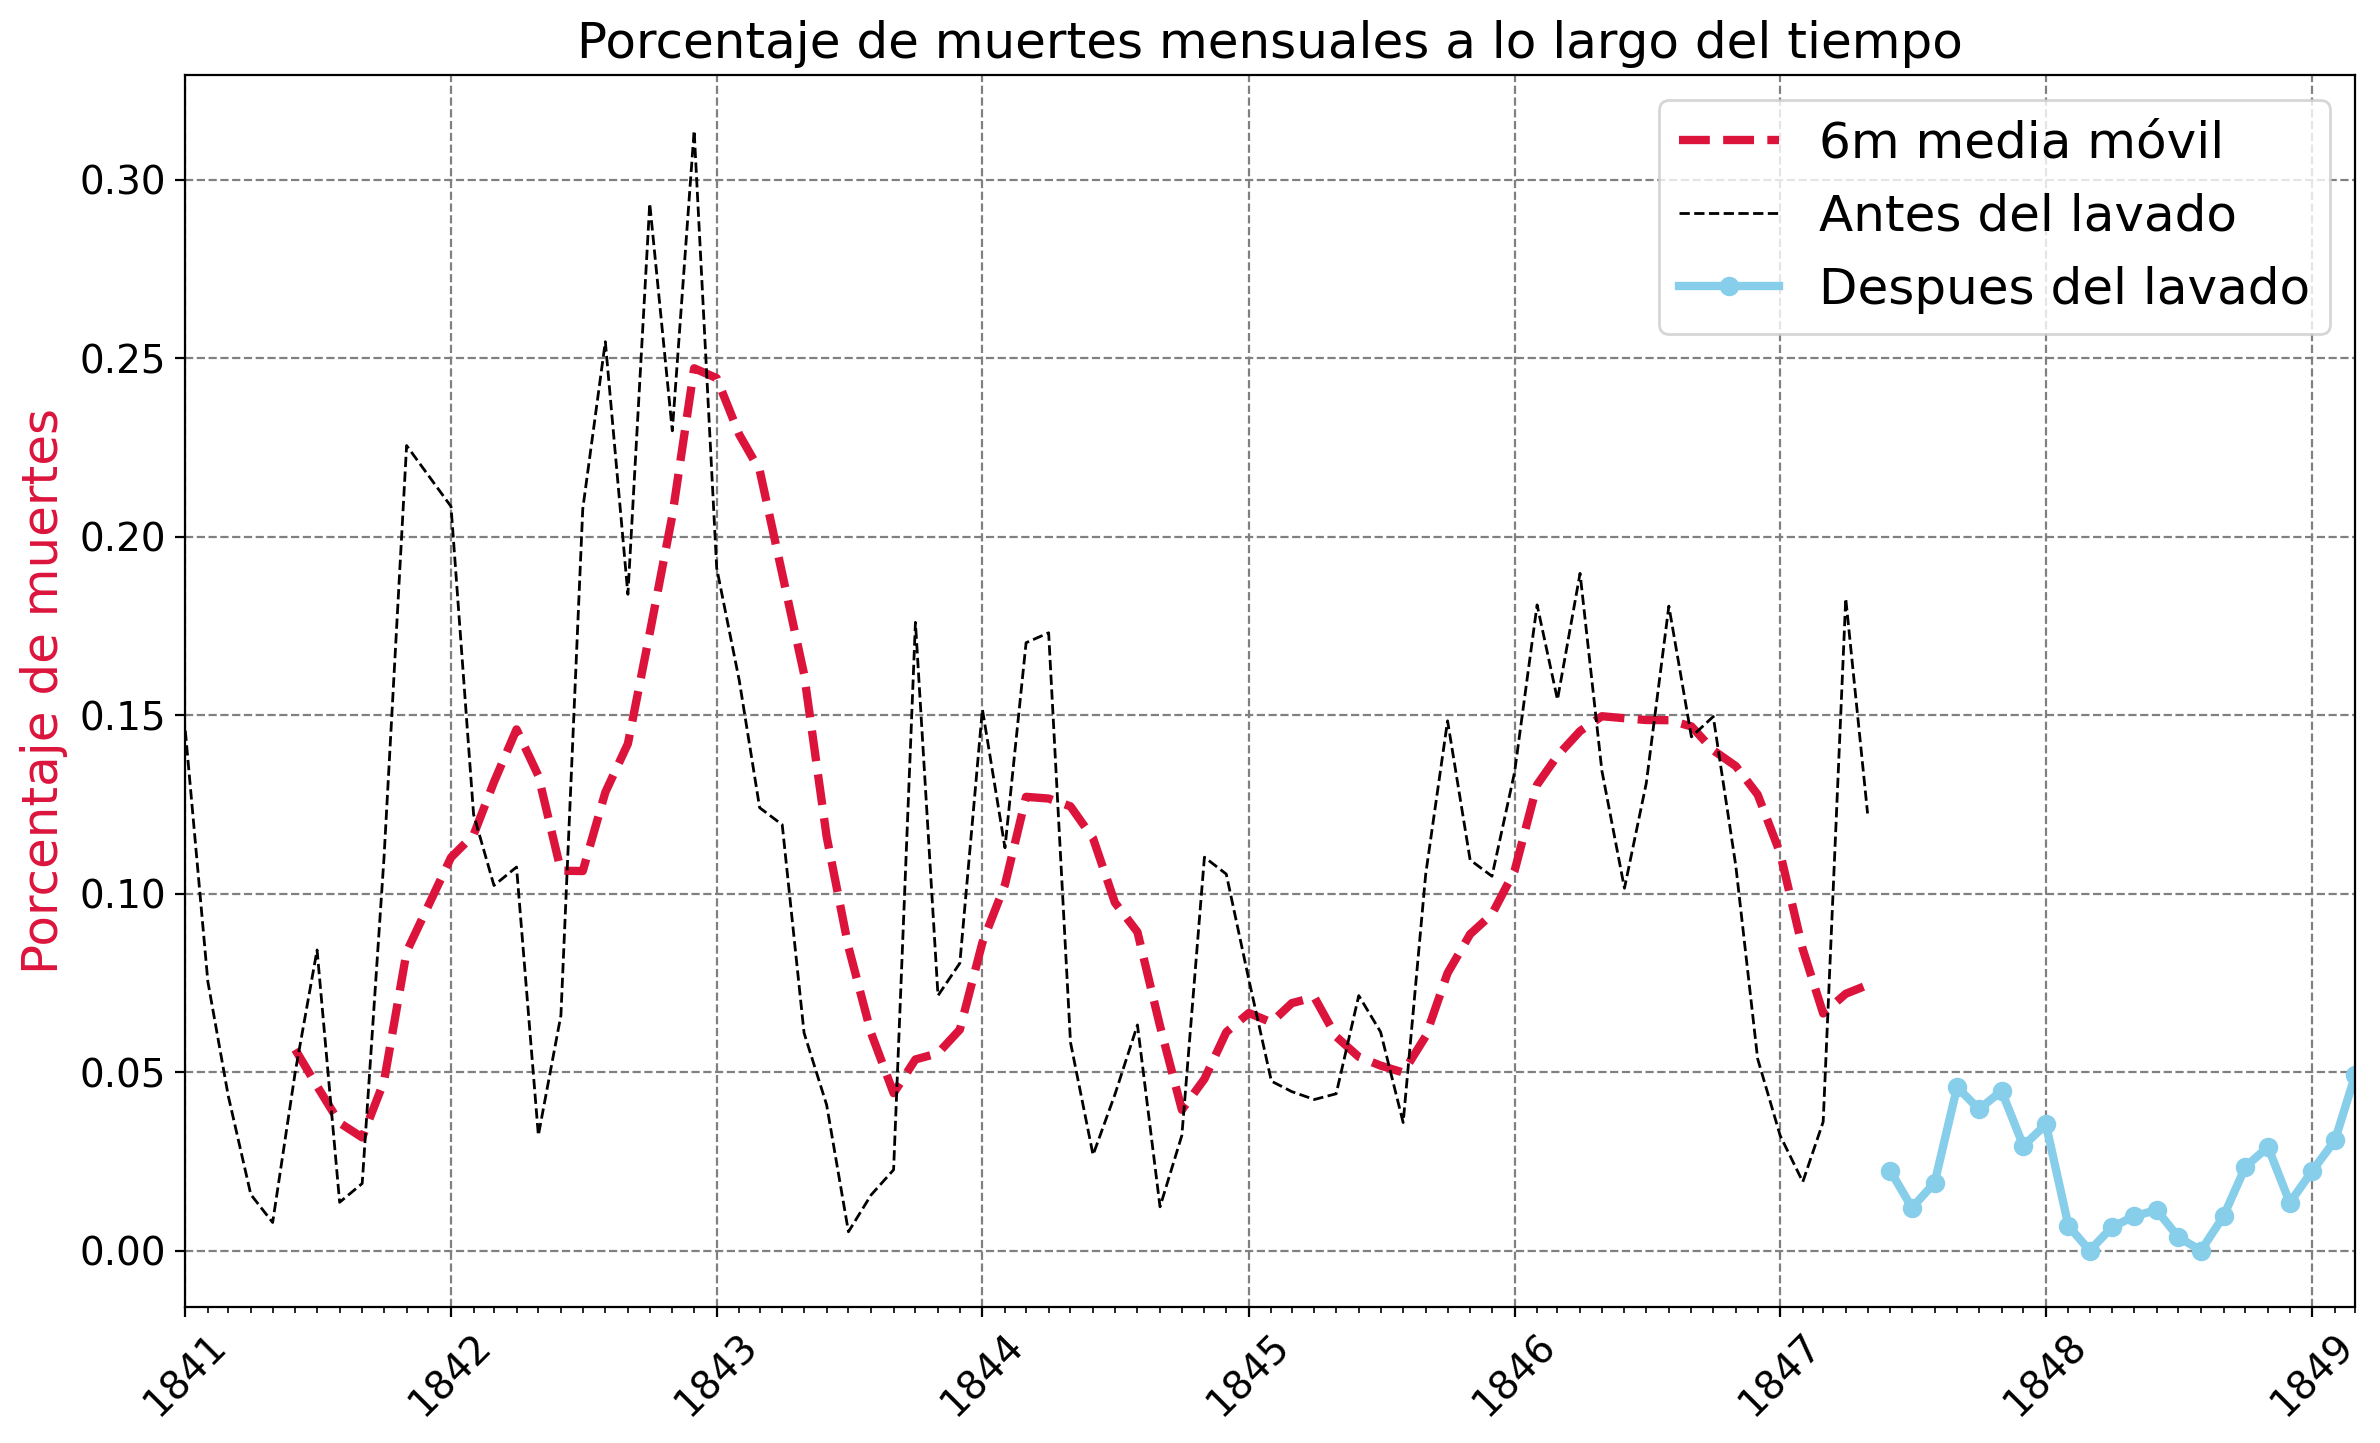

In [66]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Porcentaje de muertes mensuales a lo largo del tiempo', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Porcentaje de muertes', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                    roll_df.pct_deaths,
                    color='crimson',
                    linewidth=3,
                    linestyle='--',
                    label='6m media móvil')
bw_line, = plt.plot(before_washing.date,
                    before_washing.pct_deaths,
                    color='black',
                    linewidth=1,
                    linestyle='--',
                    label='Antes del lavado')
aw_line, = plt.plot(after_washing.date,
                    after_washing.pct_deaths,
                    color='skyblue',
                    linewidth=3,
                    marker='o',
                    label='Despues del lavado')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

### Estadísticas - Cálculo de la diferencia media mensual en el ratio de mmuertes.



In [67]:
avg_prob_before = before_washing.pct_deaths.mean() * 100
print(f'Probabilidad de muerte durante parto antes del lavado de manos: {avg_prob_before:.3}%.')

avg_prob_after = after_washing.pct_deaths.mean() * 100
print(f'Probabilidad de muerte durante parto DESPUES del lavado de manos: {avg_prob_after:.3}%.')

mean_diff = avg_prob_before - avg_prob_after
print(f'El lavado de manos redujo la proporcion mmensual de mmuertes en un: {mean_diff:.3}%!')

times = avg_prob_before / avg_prob_after
print(f'La mejora fue de un {times:.2}x !')

Probabilidad de muerte durante parto antes del lavado de manos: 10.5%.
Probabilidad de muerte durante parto DESPUES del lavado de manos: 2.11%.
El lavado de manos redujo la proporcion mmensual de mmuertes en un: 8.4%!
La mejora fue de un 5.0x !


### Diagrama de cajas para mostrar como el ratio de muerte cambio antes y despues del lavado de manos




In [68]:
# NumPy función .where()
df_monthly['manos_lavadas'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [69]:
box = px.box(df_monthly,
             x='manos_lavadas',
             y='pct_deaths',
             color='manos_lavadas',
             title='¿Cuanto han cambiado las estadísticas con el lavado de manos?')

box.update_layout(xaxis_title='¿Lavado de manos?',
                  yaxis_title='Porcentaje de muertes mensuales',)

box.show()

### Histogramas para visualizar la distribución mensual



In [70]:
hist = px.histogram(df_monthly,
                   x='pct_deaths',
                   color='manos_lavadas',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)

hist.update_layout(xaxis_title='Proporcion de muertes mensuales',
                   yaxis_title='Recuento',)

hist.show()

### Uso de la estimmacion de densidad de grano para visualizar la distribución suave.



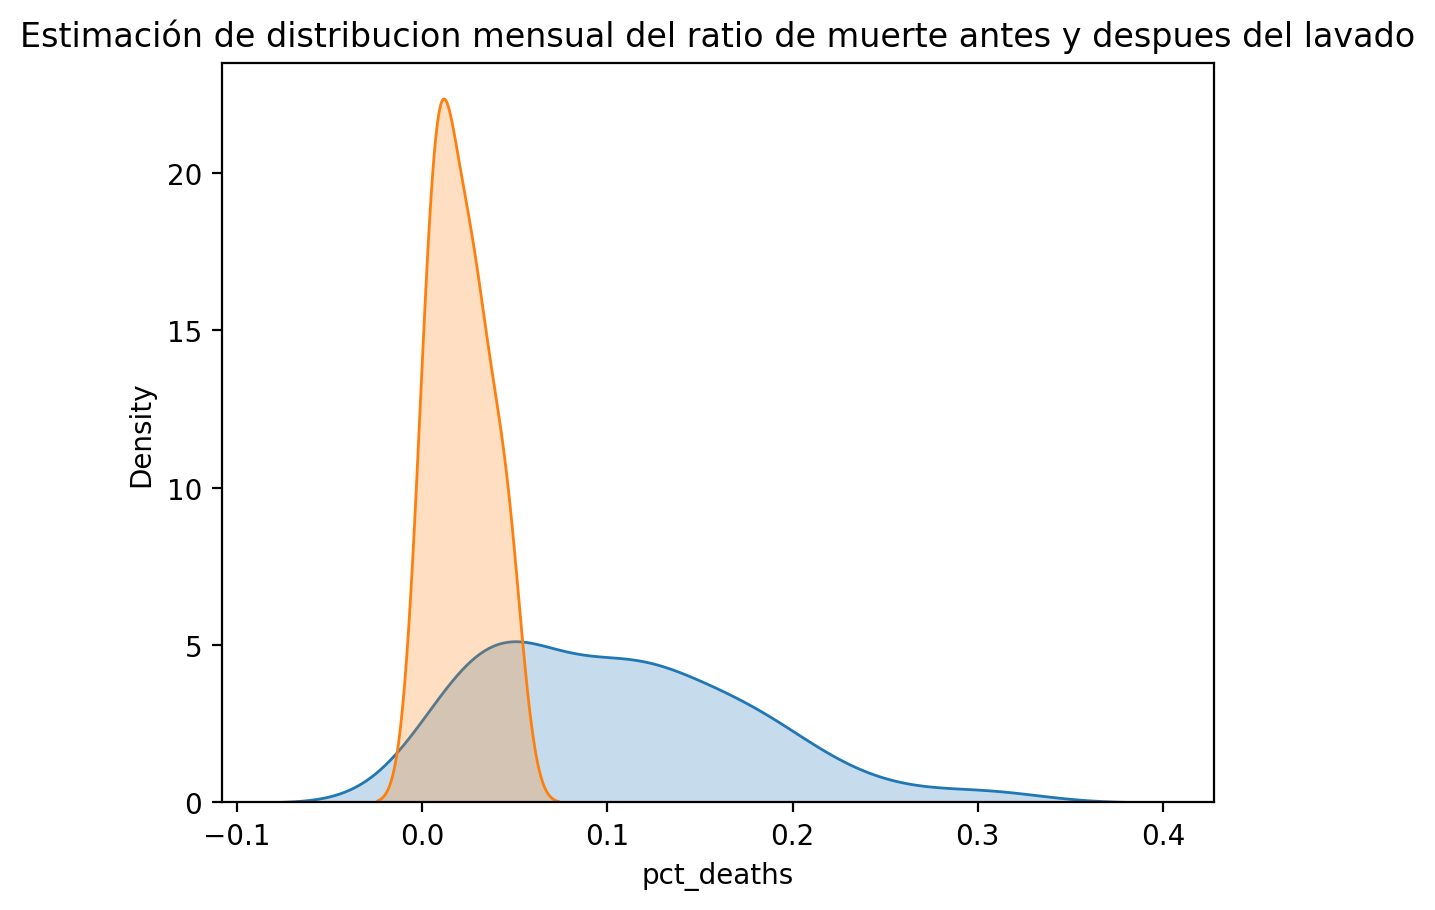

In [72]:
plt.figure(dpi=200)
# Por defecto la estimacion distribucion contiene ratios negativos de muerte
sns.kdeplot(before_washing.pct_deaths, fill=True)
sns.kdeplot(after_washing.pct_deaths, fill=True)
plt.title('Estimación de distribucion mensual del ratio de muerte antes y despues del lavado')
plt.show()

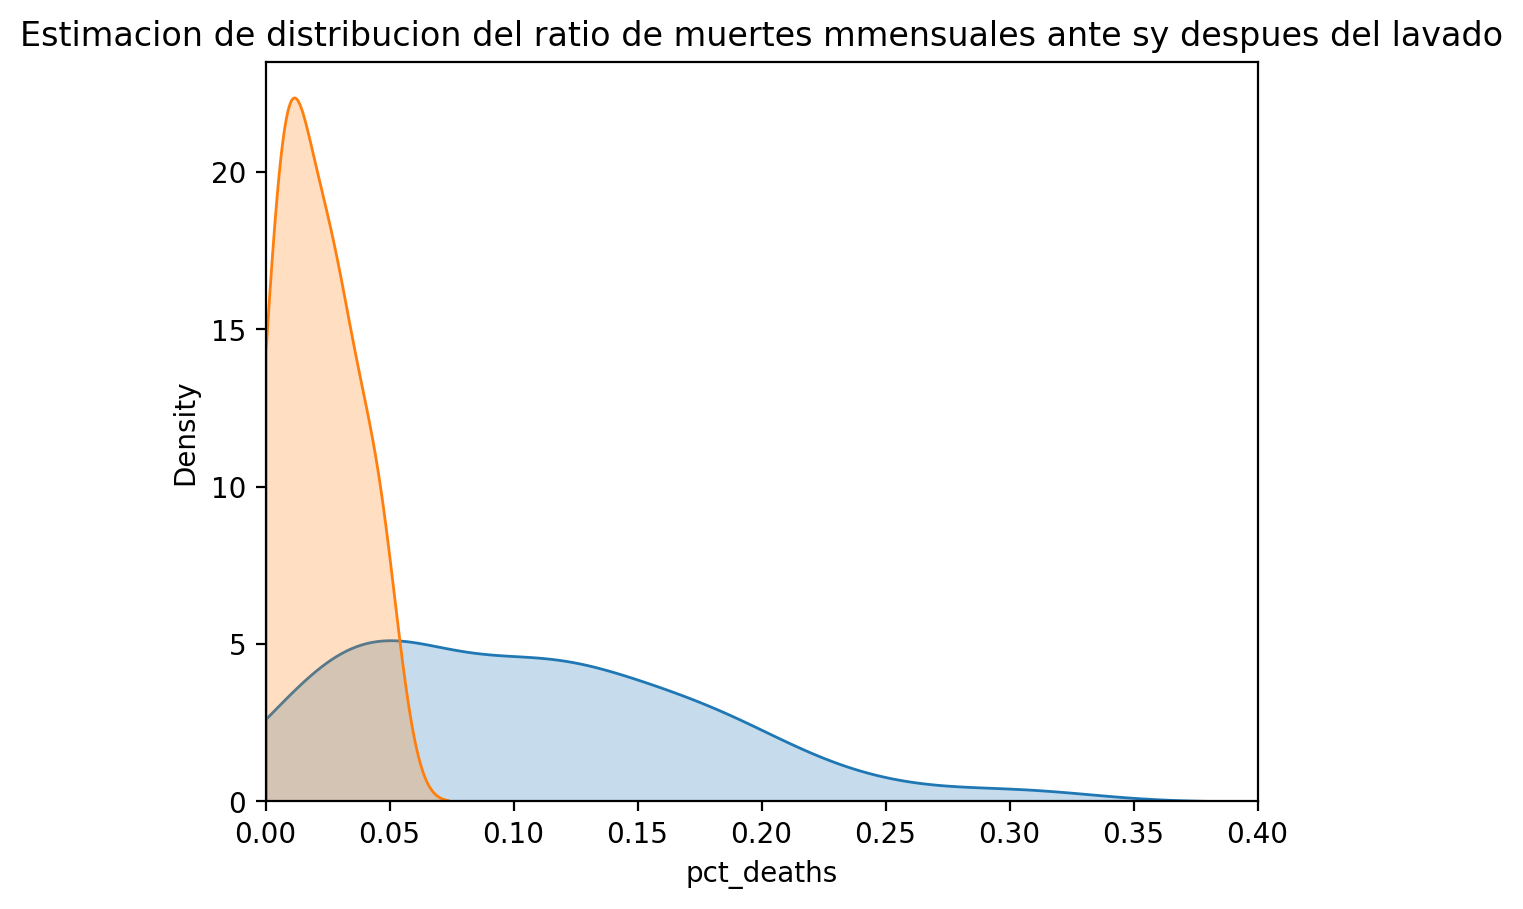

In [74]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths,
            fill=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths,
            fill=True,
            clip=(0,1))
plt.title('Estimacion de distribucion del ratio de muertes mmensuales ante sy despues del lavado')
plt.xlim(0, 0.40)
plt.show()